 # Tests on PDA

In [1]:
import sys
sys.path[0:0] = ['../..','../../3rdparty'] # Put these at the head of the search path
from jove.SystemImports import *
from jove.DotBashers    import *
from jove.Def_md2mc     import *
from jove.Def_PDA       import *

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(explore_pda)
help(run_pda)
help(classify_l_id_path)
help(h_run_pda)
help(interpret_w_eps)
help(step_pda)
help(suvivor_id)
help(term_id)
help(final_id)
help(cvt_str_to_sym)
help(is_surv_id)
help(subsumed)
help(is_term_id)
help(is_final_id)



In [2]:
repda = md2mc('''PDA
!!R -> R R | R + R | R* | ( R ) | 0 | 1 | e
I : '', #  ; R#  -> M
M : '', R  ; RR  -> M
M : '', R  ; R+R -> M
M : '', R  ; R*  -> M
M : '', R  ; (R) -> M
M : '', R  ; 0   -> M
M : '', R  ; 1   -> M
M : '', R  ; e   -> M
M : 0,  0  ; ''  -> M
M : 1,  1  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : e,  e  ; ''  -> M
M : '', #  ; #   -> F
'''
)


In [3]:
repda

{'Delta': {('I', '', '#'): {('M', 'R#')},
  ('M', '', '#'): {('F', '#')},
  ('M', '', 'R'): {('M', '(R)'),
   ('M', '0'),
   ('M', '1'),
   ('M', 'R*'),
   ('M', 'R+R'),
   ('M', 'RR'),
   ('M', 'e')},
  ('M', '(', '('): {('M', '')},
  ('M', ')', ')'): {('M', '')},
  ('M', '+', '+'): {('M', '')},
  ('M', '0', '0'): {('M', '')},
  ('M', '1', '1'): {('M', '')},
  ('M', 'e', 'e'): {('M', '')}},
 'F': {'F'},
 'Gamma': {'#', '(', ')', '*', '+', '0', '1', 'R', 'e'},
 'Q': {'F', 'I', 'M'},
 'Sigma': {'(', ')', '+', '0', '1', 'e'},
 'q0': 'I',
 'z0': '#'}

In [4]:
DO_repda = dotObj_pda(repda, FuseEdges = True)

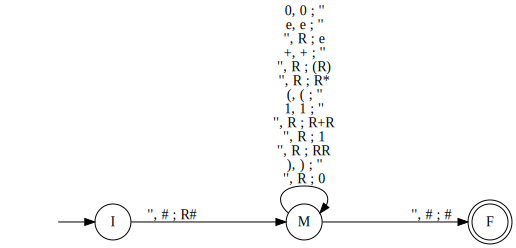

In [5]:
DO_repda

In [6]:
DO_repda.source

'// PO_St1\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\tI [label=I peripheries=1 shape=circle]\n\t\tM [label=M peripheries=1 shape=circle]\n\t\tF [label=F peripheries=2 shape=circle]\n\t\t\tEMPTY -> I\n\t\t\tI -> M [label="\'\', # ; R#"]\n\t\t\tM -> M [label="0, 0 ; \'\' \n e, e ; \'\' \n \'\', R ; e \n +, + ; \'\' \n \'\', R ; (R) \n \'\', R ; R* \n (, ( ; \'\' \n 1, 1 ; \'\' \n \'\', R ; R+R \n \'\', R ; 1 \n \'\', R ; RR \n ), ) ; \'\' \n \'\', R ; 0"]\n\t\t\tM -> F [label="\'\', # ; #"]\n}'

In [7]:
fn_dom(repda["Delta"])

[('I', '', '#'),
 ('M', '', 'R'),
 ('M', '0', '0'),
 ('M', '1', '1'),
 ('M', '(', '('),
 ('M', ')', ')'),
 ('M', '+', '+'),
 ('M', 'e', 'e'),
 ('M', '', '#')]

In [8]:
fn_range(repda["Delta"])

[{('M', 'R#')},
 {('M', '(R)'),
  ('M', '0'),
  ('M', '1'),
  ('M', 'R*'),
  ('M', 'R+R'),
  ('M', 'RR'),
  ('M', 'e')},
 {('M', '')},
 {('M', '')},
 {('M', '')},
 {('M', '')},
 {('M', '')},
 {('M', '')},
 {('F', '#')}]